In [1]:
from re import findall
from simpler import load

data = load('14.txt')
robots = [tuple(map(int, r)) for r in findall(r'=(\-?\d+),(\-?\d+) v=(\-?\d+),(\-?\d+)', data)]

In [2]:
W, H = 101, 103

def move(robots, t):
	return [((x + vx * t) % W, (y + vy * t) % H, vx, vy) for x, y, vx, vy in robots]

def quadrant(x, y):
	return 1 if x < W // 2 and y < H // 2 else (2 if x > W // 2 and y < H // 2 else (3 if x < W // 2 and y > H // 2 else (4 if x > W // 2 and y > H // 2 else None)))

quadrants = [quadrant(x, y) for x, y, *_ in move(robots, 100)]
quadrants = [quadrants.count(n) for n in range(1, 5)]
quadrants[0] * quadrants[1] * quadrants[2] * quadrants[3]

226548000

In [3]:
def dispersion(robots):
	avg = sum(r[0] for r in robots) / len(robots), sum(r[1] for r in robots) / len(robots)
	return sum(((r[0] - avg[0]) ** 2 + (r[1] - avg[1]) ** 2)**.5 for r in robots) / len(robots)

def min_dispersion(robots, max_t):
	min_t, min_d = 0, float('inf')
	for t in range(max_t):
		d = dispersion(robots)
		if d < min_d:
			min_t, min_d = t, d
		robots = move(robots, 1)
	return min_t

min_dispersion(robots, 10000)

7753

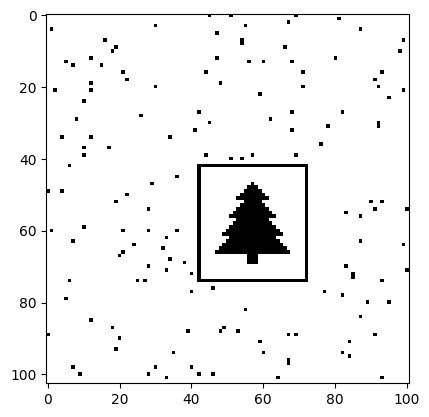

In [4]:
from matplotlib import pyplot as plt
from PIL import Image

def draw(robots):
	img = Image.new('RGB', (W, H), 'white')
	for x, y, *_ in robots:
		img.putpixel((x, y), (0, 0, 0))
	plt.imshow(img)
	plt.show()

draw(move(robots, 7753))